# Simple Exponential Smoothing

This workbook walks through simple exopential smoothing for 39 SKUs using a '.csv' file as a source and a Panda DataFrame.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from supplychainpy.model_inventory import analyse
from supplychainpy.model_demand import simple_exponential_smoothing_forecast
from supplychainpy.sample_data.config import ABS_FILE_PATH
from decimal import Decimal

To perform a simple exponential smoothing forecast we simply pass the file path and other variables to the `simple_exponential_smoothing_forecast` method:

In [2]:
analyse_kv =dict(
    file_path=ABS_FILE_PATH['COMPLETE_CSV_SM'], 
    start=1, 
    interval_length=12, 
    interval_type='months',
    z_value=Decimal(1.28), 
    reorder_cost=Decimal(400), 
    retail_price=Decimal(455), 
    file_type='csv',
    currency='USD'
)
analysis = analyse(**analyse_kv)
analysis_summary = [ i.orders_summary()for i in analysis]
KR202_209_details = [demand for demand in analysis_summary if demand.get('sku')== 'KR202-209']
print(KR202_209_details[0].get('orders').get('demand'))

('1509', '1855', '2665', '1841', '1231', '2598', '1988', '1988', '2927', '2707', '731', '2598')


In [3]:
ses_df = simple_exponential_smoothing_forecast(demand=KR202_209_details[0].get('orders').get('demand'), length=12, smoothing_level_constant=0.5)
print(ses_df)

{'statistics': {'trend': False, 'slope': 12.318181818181818, 'pvalue': 0.83542302384773304, 'slope_standard_error': 57.5994055588203, 'intercept': 1929.7272727272727, 'std_residuals': 6335.934611470233, 'test_statistic': 0.21385953029675864}, 'alpha': 0.5, 'forecast': [2129.329142252604, 2129.329142252604, 2129.329142252604, 2129.329142252604, 2129.329142252604], 'regression': [1929.7272727272727, 1942.0454545454545, 1954.3636363636365, 1966.6818181818182, 1979.0, 1991.3181818181818, 2003.6363636363637, 2015.9545454545455, 2028.2727272727273, 2040.590909090909, 2052.909090909091, 2065.227272727273], 'mape': 22.341525353039756, 'forecast_breakdown': [{'alpha': 0.5, 'level_estimates': 1781.0833333333333, 'squared_error': 296117.36111111095, 'forecast_error': -544.1666666666665, 'demand': 1509, 't': 1, 'one_step_forecast': 2053.1666666666665}, {'alpha': 0.5, 'level_estimates': 1818.0416666666665, 'squared_error': 5463.673611111122, 'forecast_error': 73.91666666666674, 'demand': 1855, 't':

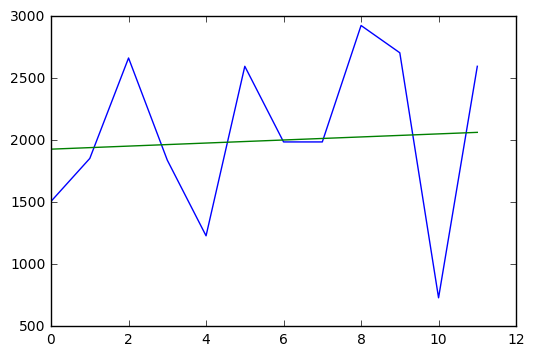

In [5]:
FF = ses_df.get('forecast')
regression = ses_df.get('regression')
demand = KR202_209_details[0].get('orders').get('demand')
plt.plot(range(12), demand)
plt.plot(range(12), regression)
plt.show()

In [6]:
from supplychainpy.inventory.summarise import Inventory
filtered_summary = Inventory(analysis)
sku_summary = [summary for summary in filtered_summary.describe_sku('KR202-209')]
print(sku_summary)

[{'unit_cost_rank': 21, 'revenue_rank': '19', 'max_order': '2927', 'safety_stock_cost': '1166373.9', 'average_orders': '2053', 'sku_id': 'KR202-209', 'percentage_contribution_revenue': '0.016654138', 'quantity_on_hand': '1003', 'excess_cost': '0', 'shortage_cost': '5984979', 'excess_rank': '6', 'shortage_rank': 15, 'retail_price': '5000', 'inventory_traffic_light': 'green', 'unit_cost': '1001', 'safety_stock_units': '1165', 'min_order': '731', 'revenue': '123190000', 'classification': 'BY', 'safety_stock_rank': '29', 'inventory_turns': '24.564307', 'excess_units': '0', 'markup_percentage': '3.9950050', 'shortage_units': '5979', 'gross_profit_margin': '3999'}]
